# Using PandaSQL for SQL Operations on Pandas DataFrames

This notebook demonstrates how to use the `pandasql` library to perform SQL operations on pandas DataFrames. We'll cover the following operations:

1. Reading CSV data into pandas
2. Selecting columns using SQL
3. Filtering by value in column using SQL
4. Aggregations using SQL
5. Filtering on aggregations using SQL
6. Left outer joins using SQL
7. Right outer joins using SQL
8. Inner joins using SQL

Let's start by importing the necessary libraries and setting up our environment.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandasql import sqldf
%matplotlib inline

# Define a function to run SQL on pandas DataFrames
def pysqldf(q):
    return sqldf(q, globals())

## 1. Reading dictonary data into pandas

First, let's create two sample datasets that we'll use throughout this notebook. We'll create them as pandas DataFrames and then save them as CSV files. In a real-world scenario, you would typically load existing CSV files.

In [2]:
# Create a sample sales DataFrame
sales_data = {
    'order_id': list(range(1, 11)),
    'customer_id': [101, 102, 101, 103, 104, 105, 103, 106, 102, 107],
    'product_id': [1, 2, 3, 1, 2, 3, 4, 5, 1, 2],
    'quantity': [2, 1, 3, 2, 1, 1, 4, 2, 3, 1],
    'price': [25.50, 35.00, 15.75, 25.50, 35.00, 15.75, 10.25, 50.00, 25.50, 35.00],
    'order_date': ['2023-01-15', '2023-01-16', '2023-01-16', '2023-01-17', '2023-01-18', 
                   '2023-01-19', '2023-01-20', '2023-01-20', '2023-01-21', '2023-01-22'],
    'category': ['Electronics', 'Clothing', 'Books', 'Electronics', 'Clothing', 
                'Books', 'Food', 'Furniture', 'Electronics', 'Clothing']
}

sales_df = pd.DataFrame(sales_data)

# Create a sample customers DataFrame
customers_data = {
    'customer_id': [101, 102, 103, 104, 105, 108, 109],  # Note: 106, 107 missing and 108, 109 not in sales
    'name': ['Alice Brown', 'Bob Smith', 'Charlie Davis', 'David Wilson', 'Emma Johnson', 'Frank Miller', 'Grace Lee'],
    'email': ['alice@example.com', 'bob@example.com', 'charlie@example.com', 'david@example.com', 
             'emma@example.com', 'frank@example.com', 'grace@example.com'],
    'city': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio'],
    'membership_level': ['Gold', 'Silver', 'Gold', 'Bronze', 'Silver', 'Gold', 'Bronze']
}

customers_df = pd.DataFrame(customers_data)

# Save DataFrames to CSV files
sales_df.to_csv('sales.csv', index=False)
customers_df.to_csv('customers.csv', index=False)

# Now read the CSV files back into pandas to simulate loading from CSV
sales_df = pd.read_csv('sales.csv')
customers_df = pd.read_csv('customers.csv')

# Use pandasql to display the first few rows of each DataFrame
q_sales = """
SELECT * FROM sales_df LIMIT 5
"""
q_customers = """
SELECT * FROM customers_df LIMIT 5
"""

print("Sales DataFrame (first 5 rows):")
pysqldf(q_sales)

Sales DataFrame (first 5 rows):


,order_id,customer_id,product_id,quantity,price,order_date,category
0,1,101,1,2,25.50,2023-01-15,Electronics
1,2,102,2,1,35.00,2023-01-16,Clothing
2,3,101,3,3,15.75,2023-01-16,Books
3,4,103,1,2,25.50,2023-01-17,Electronics
4,5,104,2,1,35.00,2023-01-18,Clothing


In [3]:
print("Customers DataFrame (first 5 rows):")
pysqldf(q_customers)

Customers DataFrame (first 5 rows):


,customer_id,name,email,city,membership_level
0,101,Alice Brown,alice@example.com,New York,Gold
1,102,Bob Smith,bob@example.com,Los Angeles,Silver
2,103,Charlie Davis,charlie@example.com,Chicago,Gold
3,104,David Wilson,david@example.com,Houston,Bronze
4,105,Emma Johnson,emma@example.com,Phoenix,Silver


## 2. Selecting Columns

Now let's explore how to select specific columns using pandasql.

In [4]:
# Select specific columns using pandasql
q = """
SELECT order_id, customer_id, product_id, price
FROM sales_df
"""
selected_columns = pysqldf(q)
print("Selected columns using pandasql:")
selected_columns.head()

Selected columns using pandasql:


,order_id,customer_id,product_id,price
0,1,101,1,25.50
1,2,102,2,35.00
2,3,101,3,15.75
3,4,103,1,25.50
4,5,104,2,35.00


In [5]:
# Select columns with aliases
q = """
SELECT 
    order_id AS 'Order ID', 
    customer_id AS 'Customer ID', 
    price AS 'Item Price'
FROM sales_df
LIMIT 10
"""
columns_with_aliases = pysqldf(q)
print("Selected columns with aliases:")
columns_with_aliases

Selected columns with aliases:


,Order ID,Customer ID,Item Price
0,1,101,25.50
1,2,102,35.00
2,3,101,15.75
3,4,103,25.50
4,5,104,35.00
5,6,105,15.75
6,7,103,10.25
7,8,106,50.00
8,9,102,25.50
9,10,107,35.00


## 3. Filtering by Value in Column

Let's filter our data based on specific column values using SQL syntax.

In [6]:
# Filter sales with price greater than 30
q = """
SELECT *
FROM sales_df
WHERE price > 30
"""
high_price_sales = pysqldf(q)
print("High price sales (> $30):")
high_price_sales

High price sales (> $30):


,order_id,customer_id,product_id,quantity,price,order_date,category
0,2,102,2,1,35.0,2023-01-16,Clothing
1,5,104,2,1,35.0,2023-01-18,Clothing
2,8,106,5,2,50.0,2023-01-20,Furniture
3,10,107,2,1,35.0,2023-01-22,Clothing


In [7]:
# Multiple filter conditions (Electronics with quantity > 1)
q = """
SELECT *
FROM sales_df
WHERE category = 'Electronics' AND quantity > 1
"""
electronics_high_qty = pysqldf(q)
print("Electronics with high quantity (> 1):")
electronics_high_qty

Electronics with high quantity (> 1):


,order_id,customer_id,product_id,quantity,price,order_date,category
0,1,101,1,2,25.5,2023-01-15,Electronics
1,4,103,1,2,25.5,2023-01-17,Electronics
2,9,102,1,3,25.5,2023-01-21,Electronics


In [8]:
# Filter with IN operator
q = """
SELECT *
FROM sales_df
WHERE category IN ('Electronics', 'Clothing')
ORDER BY category, price DESC
"""
electronics_clothing = pysqldf(q)
print("Electronics and Clothing items:")
electronics_clothing

Electronics and Clothing items:


,order_id,customer_id,product_id,quantity,price,order_date,category
0,2,102,2,1,35.0,2023-01-16,Clothing
1,5,104,2,1,35.0,2023-01-18,Clothing
2,10,107,2,1,35.0,2023-01-22,Clothing
3,1,101,1,2,25.5,2023-01-15,Electronics
4,4,103,1,2,25.5,2023-01-17,Electronics
5,9,102,1,3,25.5,2023-01-21,Electronics


In [9]:
# Filter with LIKE operator
q = """
SELECT *
FROM sales_df
WHERE category LIKE 'E%'
"""
e_categories = pysqldf(q)
print("Categories starting with 'E':")
e_categories

Categories starting with 'E':


,order_id,customer_id,product_id,quantity,price,order_date,category
0,1,101,1,2,25.5,2023-01-15,Electronics
1,4,103,1,2,25.5,2023-01-17,Electronics
2,9,102,1,3,25.5,2023-01-21,Electronics


## 4. Aggregations

Now let's perform various aggregation operations using SQL syntax.

In [10]:
# Basic aggregations using pandasql
q = """
SELECT 
    SUM(price) AS total_sales,
    AVG(price) AS average_price,
    MAX(quantity) AS max_quantity,
    MIN(price) AS min_price,
    COUNT(*) AS total_orders
FROM sales_df
"""
basic_aggs = pysqldf(q)
print("Basic aggregations:")
basic_aggs

Basic aggregations:


,total_sales,average_price,max_quantity,min_price,total_orders
0,273.25,27.325,4,10.25,10


In [11]:
# Group by category with multiple aggregations
q = """
SELECT 
    category,
    AVG(price) AS average_price,
    SUM(price) AS total_price,
    SUM(quantity) AS total_quantity,
    MAX(quantity) AS max_quantity,
    COUNT(order_id) AS order_count
FROM sales_df
GROUP BY category
ORDER BY total_price DESC
"""
category_aggs = pysqldf(q)
print("Category aggregations:")
category_aggs

Category aggregations:


,category,average_price,total_price,total_quantity,max_quantity,order_count
0,Clothing,35.00,105.00,3,1,3
1,Electronics,25.50,76.50,7,3,3
2,Furniture,50.00,50.00,2,2,1
3,Books,15.75,31.50,4,3,2
4,Food,10.25,10.25,4,4,1


In [12]:
# Calculate total revenue (price * quantity) by category
q = """
SELECT 
    category,
    SUM(price * quantity) AS total_revenue
FROM sales_df
GROUP BY category
ORDER BY total_revenue DESC
"""
revenue_by_category = pysqldf(q)
print("Revenue by category:")
revenue_by_category

Revenue by category:


,category,total_revenue
0,Electronics,178.5
1,Clothing,105.0
2,Furniture,100.0
3,Books,63.0
4,Food,41.0


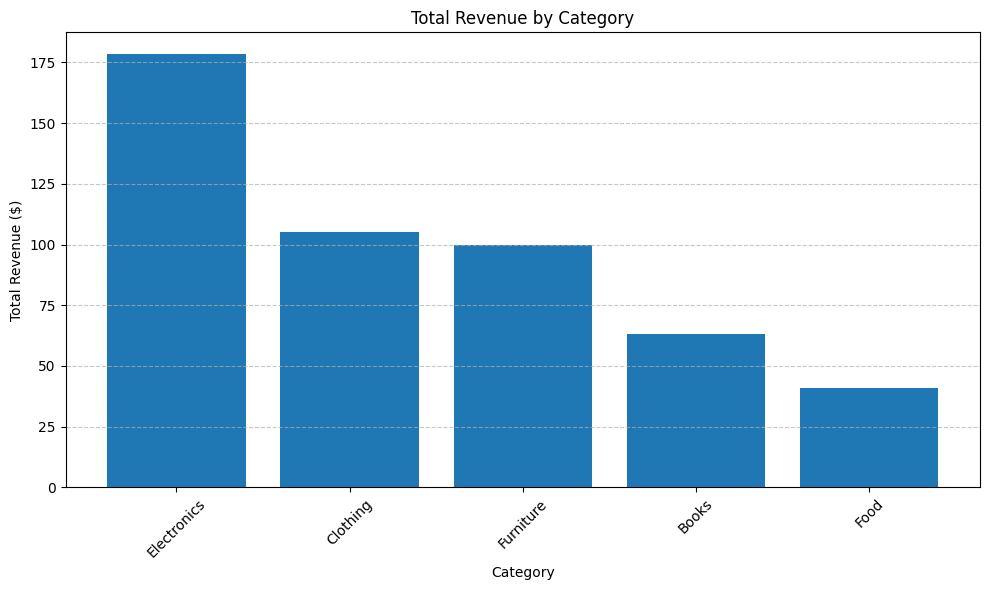

In [13]:
# Visualize the revenue by category from SQL results
plt.figure(figsize=(10, 6))
plt.bar(revenue_by_category['category'], revenue_by_category['total_revenue'])
plt.title('Total Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 5. Filtering on Aggregations

Now let's filter our data based on aggregation results using SQL HAVING clause.

In [14]:
# Find categories with average price > 25
q = """
SELECT 
    category,
    AVG(price) AS average_price
FROM sales_df
GROUP BY category
HAVING AVG(price) > 25
ORDER BY average_price DESC
"""
high_avg_price_categories = pysqldf(q)
print("Categories with high average price (> $25):")
high_avg_price_categories

Categories with high average price (> $25):


,category,average_price
0,Furniture,50.0
1,Clothing,35.0
2,Electronics,25.5


In [15]:
# Get all sales from categories with high average price
q = """
SELECT s.*
FROM sales_df s
JOIN (
    SELECT category
    FROM sales_df
    GROUP BY category
    HAVING AVG(price) > 25
) c ON s.category = c.category
ORDER BY s.category, s.price DESC
"""
sales_in_high_categories = pysqldf(q)
print("Sales in high-priced categories:")
sales_in_high_categories

Sales in high-priced categories:


,order_id,customer_id,product_id,quantity,price,order_date,category
0,2,102,2,1,35.0,2023-01-16,Clothing
1,5,104,2,1,35.0,2023-01-18,Clothing
2,10,107,2,1,35.0,2023-01-22,Clothing
3,1,101,1,2,25.5,2023-01-15,Electronics
4,4,103,1,2,25.5,2023-01-17,Electronics
5,9,102,1,3,25.5,2023-01-21,Electronics
6,8,106,5,2,50.0,2023-01-20,Furniture


In [16]:
# Find items priced higher than their category average
q = """
SELECT s.*
FROM sales_df s
JOIN (
    SELECT 
        category, 
        AVG(price) AS avg_category_price
    FROM sales_df
    GROUP BY category
) c ON s.category = c.category
WHERE s.price > c.avg_category_price
ORDER BY s.category, s.price DESC
"""
above_avg_price_items = pysqldf(q)
print("Items priced above their category average:")
above_avg_price_items

Items priced above their category average:


,order_id,customer_id,product_id,quantity,price,order_date,category


In [17]:
# Categories with more than 2 orders and total quantity > 3
q = """
SELECT 
    category,
    COUNT(*) AS order_count,
    SUM(quantity) AS total_quantity
FROM sales_df
GROUP BY category
HAVING COUNT(*) > 2 AND SUM(quantity) > 3
ORDER BY total_quantity DESC
"""
popular_categories = pysqldf(q)
print("Popular categories (>2 orders and >3 quantity):")
popular_categories

Popular categories (>2 orders and >3 quantity):


,category,order_count,total_quantity
0,Electronics,3,7


## 6. Left Outer Join

A left outer join returns all records from the left table and the matched records from the right table. If there is no match, NULL values are returned for the right table columns.

In [18]:
# Left join sales with customers using pandasql
q = """
SELECT 
    s.order_id,
    s.customer_id,
    s.product_id,
    s.quantity,
    s.price,
    s.order_date,
    s.category,
    c.name,
    c.city,
    c.membership_level
FROM sales_df s
LEFT JOIN customers_df c ON s.customer_id = c.customer_id
ORDER BY s.order_id
"""
left_join = pysqldf(q)
print("Left join (all sales, matching customers):")
left_join

Left join (all sales, matching customers):


,order_id,customer_id,product_id,quantity,price,order_date,category,name,city,membership_level
0,1,101,1,2,25.50,2023-01-15,Electronics,Alice Brown,New York,Gold
1,2,102,2,1,35.00,2023-01-16,Clothing,Bob Smith,Los Angeles,Silver
2,3,101,3,3,15.75,2023-01-16,Books,Alice Brown,New York,Gold
3,4,103,1,2,25.50,2023-01-17,Electronics,Charlie Davis,Chicago,Gold
4,5,104,2,1,35.00,2023-01-18,Clothing,David Wilson,Houston,Bronze
5,6,105,3,1,15.75,2023-01-19,Books,Emma Johnson,Phoenix,Silver
6,7,103,4,4,10.25,2023-01-20,Food,Charlie Davis,Chicago,Gold
7,8,106,5,2,50.00,2023-01-20,Furniture,None,None,None
8,9,102,1,3,25.50,2023-01-21,Electronics,Bob Smith,Los Angeles,Silver
9,10,107,2,1,35.00,2023-01-22,Clothing,None,None,None


In this left join, all sales records are included regardless of whether there's a matching customer. Notice that some rows have NULL values for customer information because customers 106 and 107 are not in the customers table.

## 7. Right Outer Join

A right outer join returns all records from the right table and the matched records from the left table. If there is no match, NULL values are returned for the left table columns.

Note: SQLite (which pandasql uses) doesn't directly support RIGHT JOIN, but we can simulate it by flipping the tables in a LEFT JOIN.

In [19]:
# Right join sales with customers using pandasql
# (Implemented as a LEFT JOIN with tables flipped)
q = """
SELECT 
    s.order_id,
    c.customer_id,
    s.product_id,
    s.quantity,
    s.price,
    s.order_date,
    s.category,
    c.name,
    c.city,
    c.membership_level
FROM customers_df c
LEFT JOIN sales_df s ON c.customer_id = s.customer_id
ORDER BY c.customer_id, s.order_id
"""
right_join = pysqldf(q)
print("Right join (all customers, matching sales):")
right_join

Right join (all customers, matching sales):


,order_id,customer_id,product_id,quantity,price,order_date,category,name,city,membership_level
0,1.0,101,1.0,2.0,25.50,2023-01-15,Electronics,Alice Brown,New York,Gold
1,3.0,101,3.0,3.0,15.75,2023-01-16,Books,Alice Brown,New York,Gold
2,2.0,102,2.0,1.0,35.00,2023-01-16,Clothing,Bob Smith,Los Angeles,Silver
3,9.0,102,1.0,3.0,25.50,2023-01-21,Electronics,Bob Smith,Los Angeles,Silver
4,4.0,103,1.0,2.0,25.50,2023-01-17,Electronics,Charlie Davis,Chicago,Gold
5,7.0,103,4.0,4.0,10.25,2023-01-20,Food,Charlie Davis,Chicago,Gold
6,5.0,104,2.0,1.0,35.00,2023-01-18,Clothing,David Wilson,Houston,Bronze
7,6.0,105,3.0,1.0,15.75,2023-01-19,Books,Emma Johnson,Phoenix,Silver
8,NaN,108,NaN,NaN,NaN,None,None,Frank Miller,Philadelphia,Gold
9,NaN,109,NaN,NaN,NaN,None,None,Grace Lee,San Antonio,Bronze


In this right join, all customer records are included regardless of whether they have any sales. Notice that customers 108 and 109 appear in the results with NULL values for sales information because they haven't made any purchases.

## 8. Inner Join

An inner join returns only the records that have matching values in both tables.

In [20]:
# Inner join sales with customers using pandasql
q = """
SELECT 
    s.order_id,
    s.customer_id,
    s.product_id,
    s.quantity,
    s.price,
    s.order_date,
    s.category,
    c.name,
    c.city,
    c.membership_level
FROM sales_df s
INNER JOIN customers_df c ON s.customer_id = c.customer_id
ORDER BY s.order_id
"""
inner_join = pysqldf(q)
print("Inner join (only matching records):")
inner_join

Inner join (only matching records):


,order_id,customer_id,product_id,quantity,price,order_date,category,name,city,membership_level
0,1,101,1,2,25.50,2023-01-15,Electronics,Alice Brown,New York,Gold
1,2,102,2,1,35.00,2023-01-16,Clothing,Bob Smith,Los Angeles,Silver
2,3,101,3,3,15.75,2023-01-16,Books,Alice Brown,New York,Gold
3,4,103,1,2,25.50,2023-01-17,Electronics,Charlie Davis,Chicago,Gold
4,5,104,2,1,35.00,2023-01-18,Clothing,David Wilson,Houston,Bronze
5,6,105,3,1,15.75,2023-01-19,Books,Emma Johnson,Phoenix,Silver
6,7,103,4,4,10.25,2023-01-20,Food,Charlie Davis,Chicago,Gold
7,9,102,1,3,25.50,2023-01-21,Electronics,Bob Smith,Los Angeles,Silver


In this inner join, only records with matching customer IDs in both tables are included. The orders from customers 106 and 107 are excluded because those customers aren't in the customers table, and customers 108 and 109 are excluded because they don't have any orders.

## Bonus: Advanced Analysis with Joins and Aggregations

Let's combine what we've learned to perform a more complex analysis that uses joins and aggregations together.

In [21]:
# Find the total spending by membership level using pandasql
q = """
SELECT 
    c.membership_level,
    COUNT(DISTINCT s.customer_id) AS customer_count,
    COUNT(s.order_id) AS order_count,
    SUM(s.price * s.quantity) AS total_spent,
    AVG(s.price * s.quantity) AS avg_order_value,
    SUM(s.price * s.quantity) / COUNT(DISTINCT s.customer_id) AS avg_spent_per_customer
FROM sales_df s
JOIN customers_df c ON s.customer_id = c.customer_id
GROUP BY c.membership_level
ORDER BY total_spent DESC
"""
membership_analysis = pysqldf(q)
print("Spending analysis by membership level:")
membership_analysis

Spending analysis by membership level:


,membership_level,customer_count,order_count,total_spent,avg_order_value,avg_spent_per_customer
0,Gold,2,4,190.25,47.562500,95.125
1,Silver,2,3,127.25,42.416667,63.625
2,Bronze,1,1,35.00,35.000000,35.000


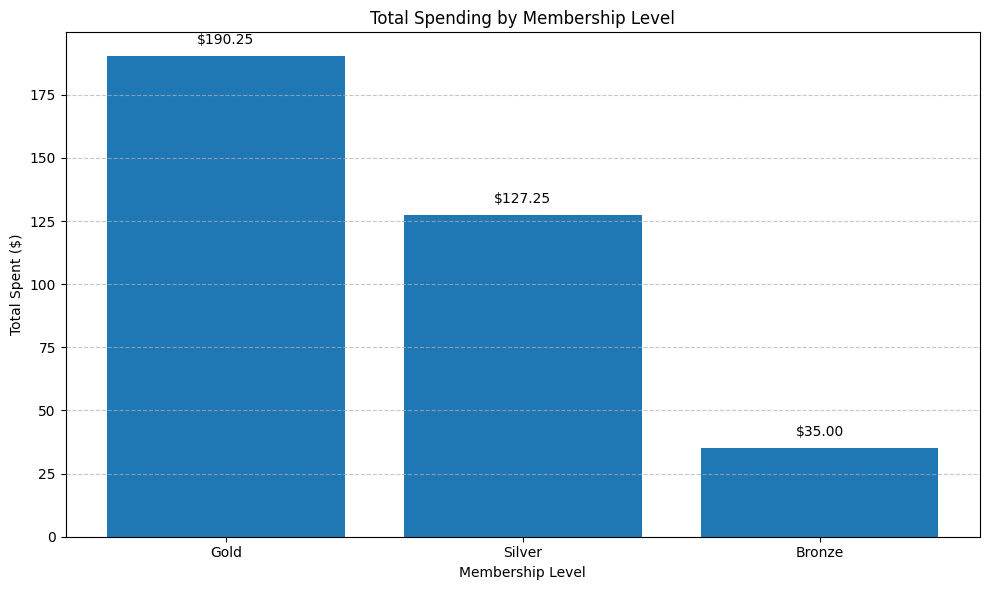

In [22]:
# Visualize the total spending by membership level
plt.figure(figsize=(10, 6))
plt.bar(membership_analysis['membership_level'], membership_analysis['total_spent'])
plt.title('Total Spending by Membership Level')
plt.xlabel('Membership Level')
plt.ylabel('Total Spent ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of the bars
for i, v in enumerate(membership_analysis['total_spent']):
    plt.text(i, v + 5, f'${v:.2f}', ha='center')

plt.tight_layout()
plt.show()

In [23]:
# Find top customers by total spending
q = """
SELECT 
    s.customer_id,
    c.name,
    c.membership_level,
    COUNT(s.order_id) AS order_count,
    SUM(s.price * s.quantity) AS total_spent
FROM sales_df s
JOIN customers_df c ON s.customer_id = c.customer_id
GROUP BY s.customer_id, c.name, c.membership_level
ORDER BY total_spent DESC
"""
top_customers = pysqldf(q)
print("Top customers by total spending:")
top_customers

Top customers by total spending:


,customer_id,name,membership_level,order_count,total_spent
0,102,Bob Smith,Silver,2,111.50
1,101,Alice Brown,Gold,2,98.25
2,103,Charlie Davis,Gold,2,92.00
3,104,David Wilson,Bronze,1,35.00
4,105,Emma Johnson,Silver,1,15.75


In [24]:
# Find categories most popular with Gold members
q = """
SELECT 
    s.category,
    COUNT(s.order_id) AS order_count,
    SUM(s.quantity) AS total_quantity,
    SUM(s.price * s.quantity) AS total_spent
FROM sales_df s
JOIN customers_df c ON s.customer_id = c.customer_id
WHERE c.membership_level = 'Gold'
GROUP BY s.category
ORDER BY total_spent DESC
"""
gold_member_categories = pysqldf(q)
print("Categories popular with Gold members:")
gold_member_categories

Categories popular with Gold members:


,category,order_count,total_quantity,total_spent
0,Electronics,2,4,102.00
1,Books,1,3,47.25
2,Food,1,4,41.00


## Conclusion

In this notebook, we've demonstrated how to use pandasql to perform SQL operations directly on pandas DataFrames. We've covered:

1. Reading CSV data into pandas
2. Selecting columns with SQL
3. Filtering by value in column using SQL
4. Performing aggregations with SQL
5. Filtering on aggregations with SQL
6. Left outer joins with SQL
7. Right outer joins with SQL
8. Inner joins with SQL

Pandasql provides a powerful way to use SQL syntax for data manipulation tasks directly on pandas DataFrames. This can be particularly useful for those who are familiar with SQL and want to leverage that knowledge while working with pandas.